# Experiment

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("./initial_data.csv")
df

,Engine speed,Engine load,Railpressure,Air supply,Crank angle,Intake pressure,Back pressure,Intake temperature,NOx,PM 1,CO2,PM 2,Pressure cylinder
0,700.0,7.33,500.9,78.3753,1.91,967.5,1027.3,65.5,17.977838,0.151139,2.891628,1.690335,44.946302
1,700.0,25.85,577.6,118.0673,0.94,1017.6,1063.8,53.4,30.613788,0.421432,10.976312,4.617809,55.885778
2,700.0,46.67,615.8,144.3557,2.86,1086.7,1156.2,47.9,109.199806,0.767395,18.844496,5.139177,73.029761
3,700.0,69.55,778.3,174.1779,2.22,1171.1,1215.1,42.7,186.406729,0.658505,27.739765,4.104144,86.322103
4,700.0,94.33,900.1,213.3148,-1.72,1313.3,1305.9,38.3,315.430180,0.773289,39.269865,4.298426,93.842141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2100.0,124.97,2500.1,1010.2031,4.27,3036.0,3326.6,80.6,278.449031,3.488290,146.110064,5.469055,147.986138
96,2200.0,12.60,2294.6,321.2649,5.70,1084.5,1251.6,68.0,68.305489,0.239003,14.550722,0.732065,55.088165
97,2200.0,31.97,2407.8,360.0267,4.44,1210.4,1407.5,68.1,59.023118,0.730860,40.950969,2.564499,60.120395
98,2200.0,53.83,2499.2,533.5734,1.76,1541.1,1684.0,63.8,126.579292,0.525628,65.469261,1.170453,71.750006


In [14]:
df_range = df.describe().loc[['min', 'max']]
df_range


,Engine speed,Engine load,Railpressure,Air supply,Crank angle,Intake pressure,Back pressure,Intake temperature,NOx,PM 1,CO2,PM 2,Pressure cylinder
min,700.0,7.33,500.9,78.3753,-5.97,967.5,1019.1,38.3,17.977838,0.151139,2.891628,0.722099,44.946302
max,2200.0,145.38,2500.3,1010.2031,6.43,3129.9,3329.4,80.6,703.824661,5.698707,163.080520,16.283255,160.047375


In [15]:
# df.iloc[:, :8].plot(kind='line')
# plt.xlabel('X-axis label')
# plt.ylabel('Y-axis label')
# plt.legend()
# plt.show()

# df['Railpressure'].plot(kind='line')
# plt.xlabel('X-axis label')
# plt.ylabel('Y-axis label')
# plt.legend()
# plt.show()



In [16]:
df_range_transposed = df_range.transpose()
df_range_transposed


,min,max
Engine speed,700.000000,2200.000000
Engine load,7.330000,145.380000
Railpressure,500.900000,2500.300000
Air supply,78.375300,1010.203100
Crank angle,-5.970000,6.430000
Intake pressure,967.500000,3129.900000
Back pressure,1019.100000,3329.400000
Intake temperature,38.300000,80.600000
NOx,17.977838,703.824661
PM 1,0.151139,5.698707


In [17]:
import numpy as np
from scipy.stats import iqr, kurtosis, skew

# Calculate metrics for each column
variance = df.var()
iqr_values = iqr(df)
kurtosis_values = kurtosis(df)
skewness_values = skew(df)
snr_values = np.abs(df.mean()) / df.std()
coefficient_of_variation = (df.std() / df.mean()) * 100

# Add metrics to df_range_transposed dataframe
df_range_transposed['Variance'] = variance
df_range_transposed['IQR'] = iqr_values
df_range_transposed['Kurtosis'] = kurtosis_values
df_range_transposed['Skewness'] = skewness_values
df_range_transposed['SNR'] = snr_values
df_range_transposed['Coefficient of Variation'] = coefficient_of_variation

df_range_transposed


,min,max,Variance,IQR,Kurtosis,Skewness,SNR,Coefficient of Variation
Engine speed,700.000000,2200.000000,196868.686869,1068.854997,-1.178691,-0.013946,3.267982,30.599922
Engine load,7.330000,145.380000,1776.636560,1068.854997,-1.251166,0.067769,1.709462,58.497944
Railpressure,500.900000,2500.300000,323178.348464,1068.854997,-1.057320,-0.160979,2.965744,33.718356
Air supply,78.375300,1010.203100,51359.834059,1068.854997,-0.153263,0.785968,1.786380,55.979115
Crank angle,-5.970000,6.430000,12.215949,1068.854997,-1.094863,-0.162211,0.227087,440.359350
Intake pressure,967.500000,3129.900000,354651.495930,1068.854997,-0.308022,0.891726,2.671961,37.425693
Back pressure,1019.100000,3329.400000,344079.862476,1068.854997,0.613273,1.219712,2.767479,36.133963
Intake temperature,38.300000,80.600000,97.592873,1068.854997,-0.585257,-0.108132,5.963816,16.767789
NOx,17.977838,703.824661,17992.440759,1068.854997,2.326017,1.326007,1.269536,78.768925
PM 1,0.151139,5.698707,1.705617,1068.854997,-0.567194,0.548645,1.456162,68.673681


In [18]:
df_range_transposed = df_range_transposed.drop(df_range_transposed.index[:8])
df_range_transposed


,min,max,Variance,IQR,Kurtosis,Skewness,SNR,Coefficient of Variation
NOx,17.977838,703.824661,17992.440759,1068.854997,2.326017,1.326007,1.269536,78.768925
PM 1,0.151139,5.698707,1.705617,1068.854997,-0.567194,0.548645,1.456162,68.673681
CO2,2.891628,163.080520,1627.155325,1068.854997,-0.603344,0.533439,1.483194,67.422064
PM 2,0.722099,16.283255,9.360157,1068.854997,1.587478,1.183968,1.781614,56.128893
Pressure cylinder,44.946302,160.047375,809.419474,1068.854997,-0.340989,0.786129,2.910450,34.358944


In [19]:
df_range_transposed

,min,max,Variance,IQR,Kurtosis,Skewness,SNR,Coefficient of Variation
NOx,17.977838,703.824661,17992.440759,1068.854997,2.326017,1.326007,1.269536,78.768925
PM 1,0.151139,5.698707,1.705617,1068.854997,-0.567194,0.548645,1.456162,68.673681
CO2,2.891628,163.080520,1627.155325,1068.854997,-0.603344,0.533439,1.483194,67.422064
PM 2,0.722099,16.283255,9.360157,1068.854997,1.587478,1.183968,1.781614,56.128893
Pressure cylinder,44.946302,160.047375,809.419474,1068.854997,-0.340989,0.786129,2.910450,34.358944


In [20]:
df_range_transposed['range'] = df_range_transposed['max'] - df_range_transposed['min']
df_range_transposed

,min,max,Variance,IQR,Kurtosis,Skewness,SNR,Coefficient of Variation,range
NOx,17.977838,703.824661,17992.440759,1068.854997,2.326017,1.326007,1.269536,78.768925,685.846823
PM 1,0.151139,5.698707,1.705617,1068.854997,-0.567194,0.548645,1.456162,68.673681,5.547569
CO2,2.891628,163.080520,1627.155325,1068.854997,-0.603344,0.533439,1.483194,67.422064,160.188892
PM 2,0.722099,16.283255,9.360157,1068.854997,1.587478,1.183968,1.781614,56.128893,15.561156
Pressure cylinder,44.946302,160.047375,809.419474,1068.854997,-0.340989,0.786129,2.910450,34.358944,115.101073


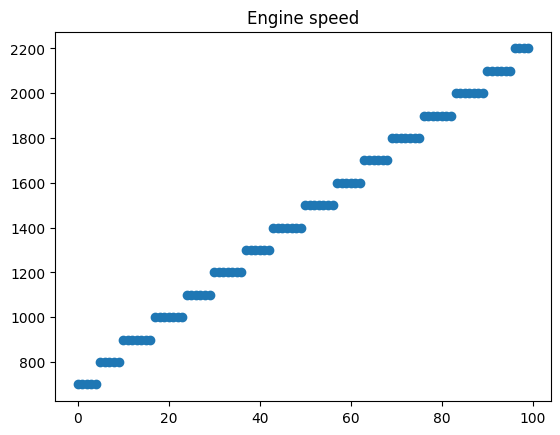

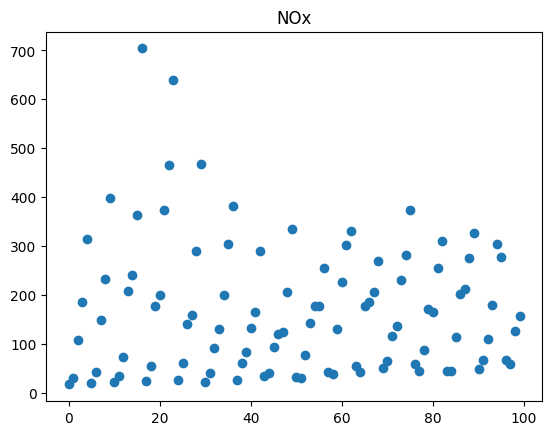

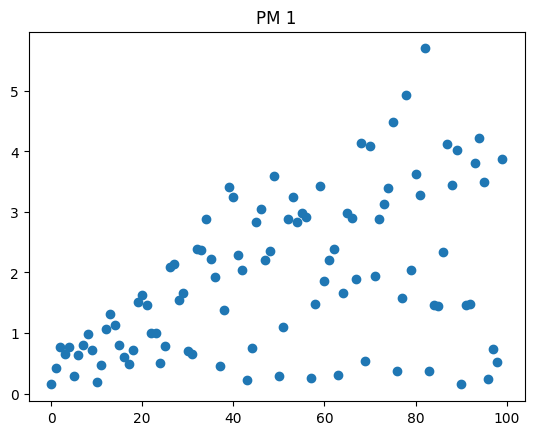

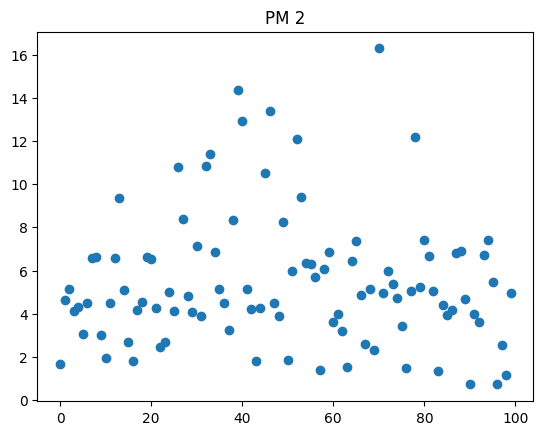

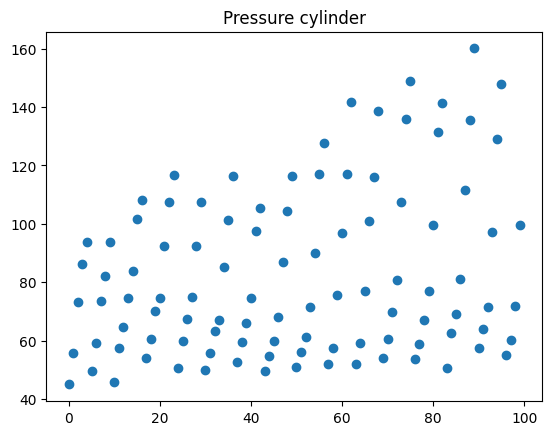

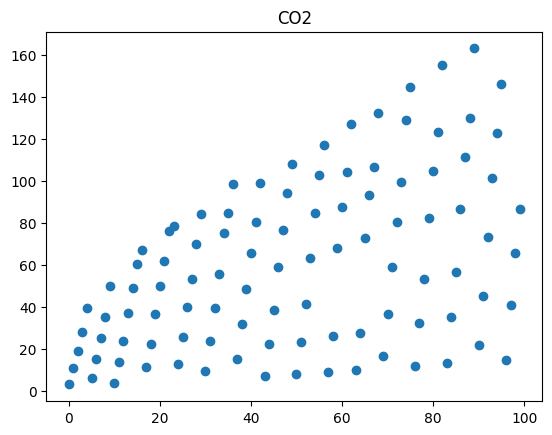

In [33]:
import matplotlib.pyplot as plt
df_info = df[['Engine speed', 'NOx', 'PM 1', 'PM 2', 'Pressure cylinder', 'CO2']]
# Scatterplots
for column in df_info:
    plt.figure()
    plt.scatter(df_info.index, df_info[column])
    plt.title(column)
    plt.show()


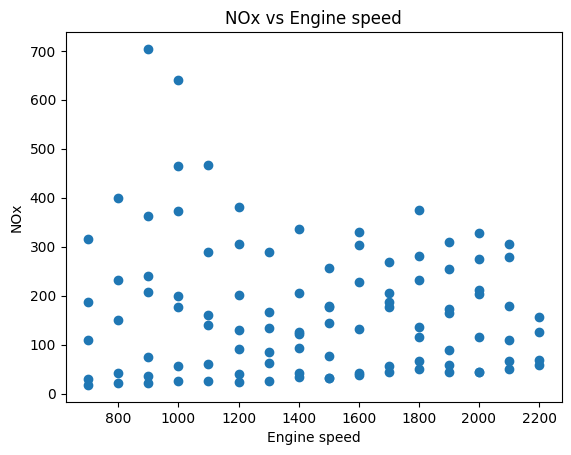

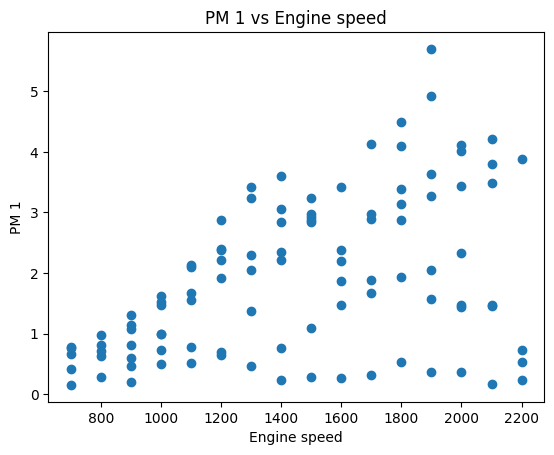

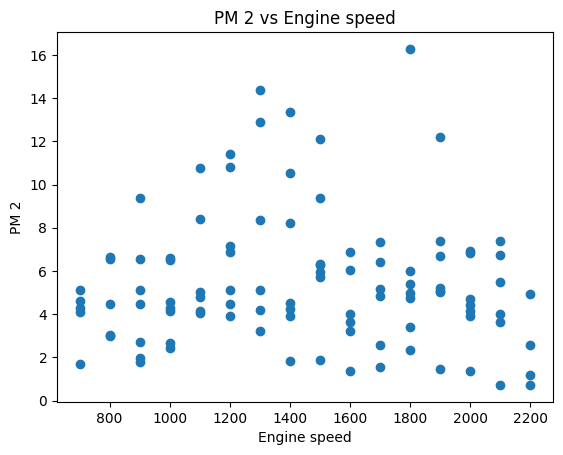

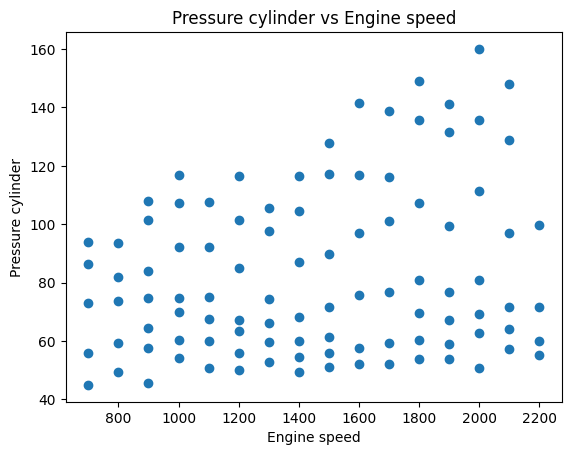

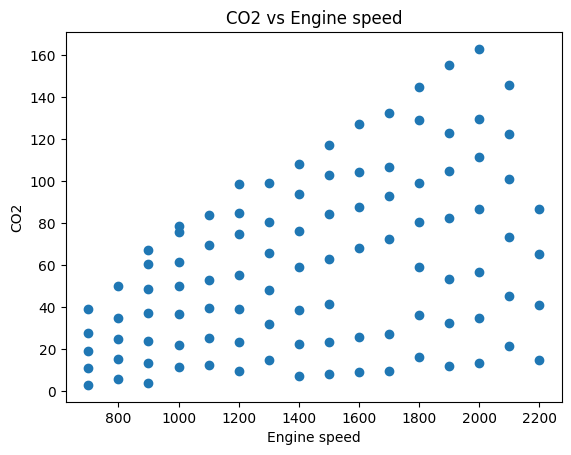

In [34]:
df_info = df[['Engine speed', 'NOx', 'PM 1', 'PM 2', 'Pressure cylinder', 'CO2']]

# Scatterplots
for column in df_info.columns[1:]:
    plt.figure()
    plt.scatter(df_info['Engine speed'], df_info[column])
    plt.xlabel('Engine speed')
    plt.ylabel(column)
    plt.title(f'{column} vs Engine speed')
    plt.show()


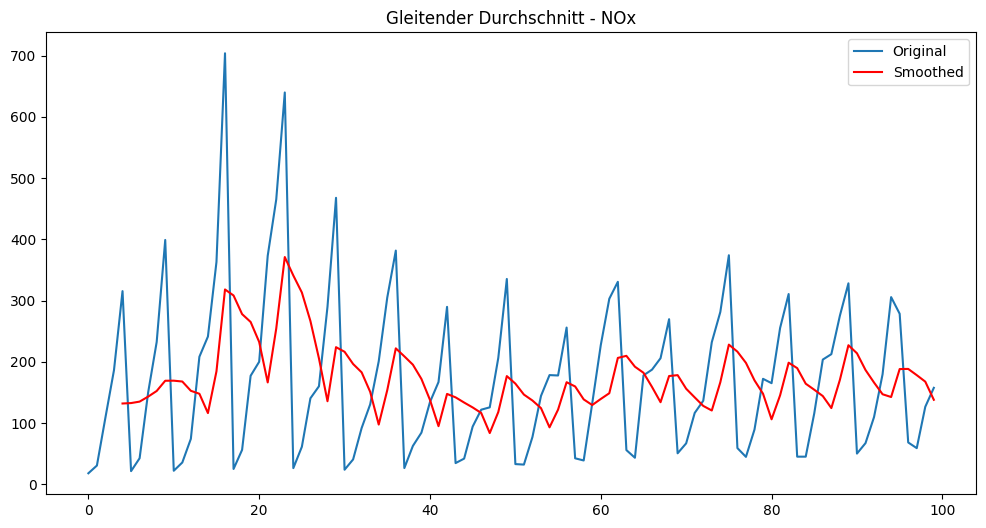

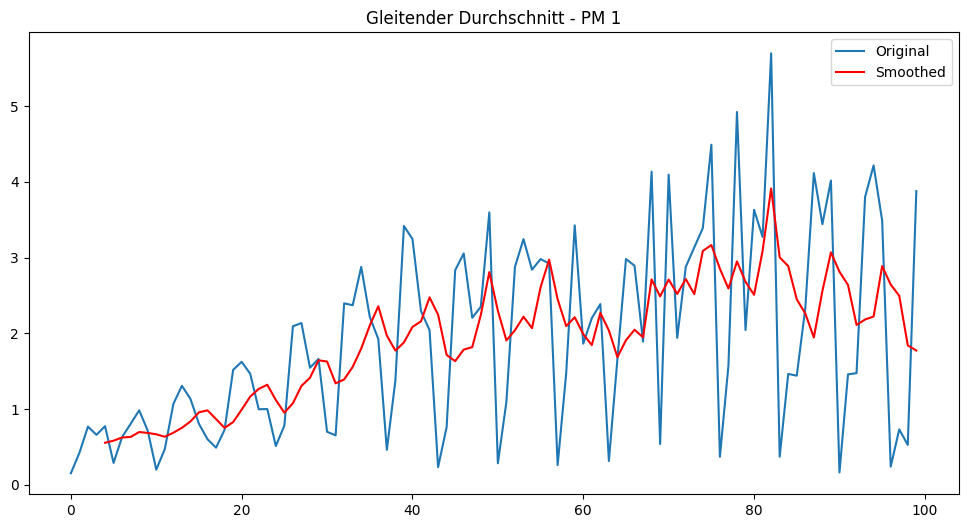

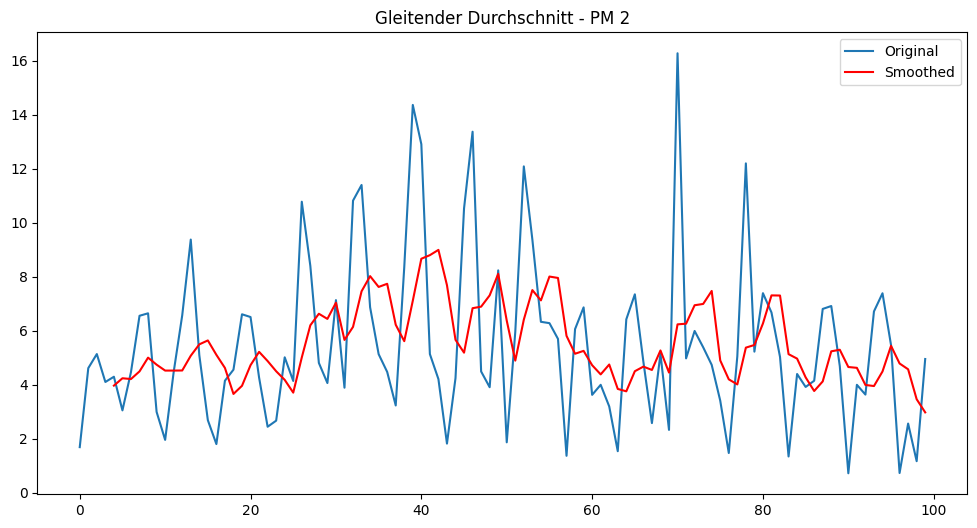

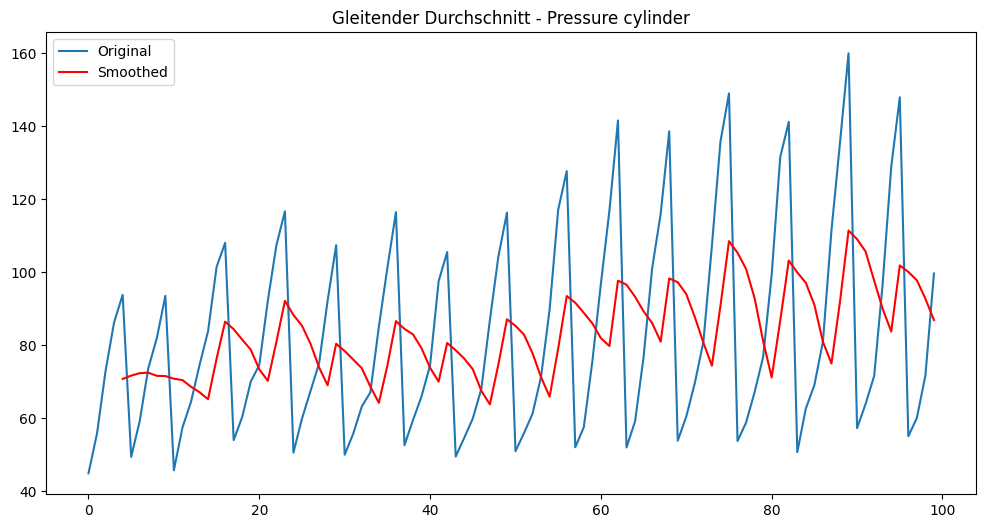

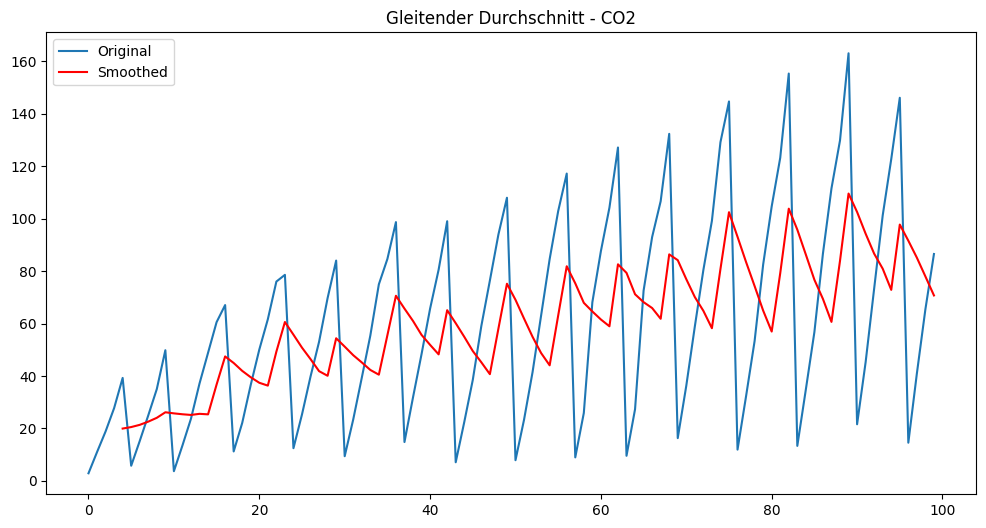

In [42]:
window_size = 5
smoothed_data = df_info.iloc[:, 1:].rolling(window=window_size).mean()

# Plot original vs. smoothed data
for column in smoothed_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_info[column], label='Original')
    plt.plot(smoothed_data[column], label='Smoothed', color='red')
    plt.legend()
    plt.title(f'Gleitender Durchschnitt - {column}')
    plt.show()


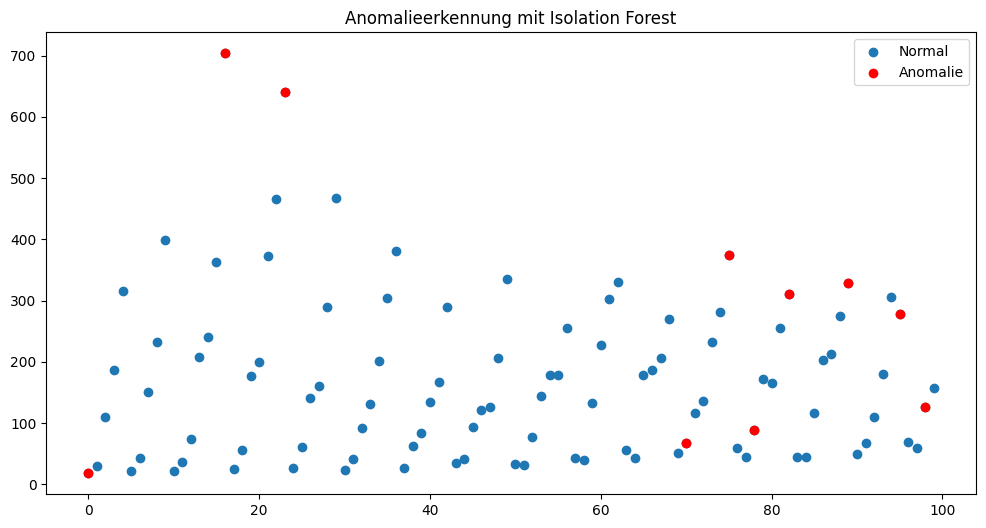

In [47]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)
clf.fit(df_info)
anomalies = clf.predict(df_info)
scores = clf.decision_function(df_info)

plt.figure(figsize=(12, 6))
plt.scatter(df_info.index, df_info['NOx'], label='Normal')
plt.scatter(df_info.index[anomalies == -1], df_info['NOx'][anomalies == -1], color='red', label='Anomalie')
plt.legend()
plt.title('Anomalieerkennung mit Isolation Forest')
plt.show()


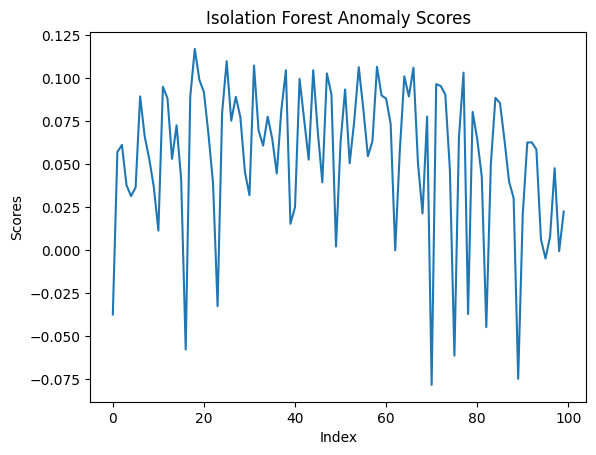

In [49]:
import matplotlib.pyplot as plt

plt.plot(scores)
plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Isolation Forest Anomaly Scores')
plt.show()


In [50]:
worst_scores = scores.nlargest(10, 'Anomaly Score')
worst_scores


KeyError: 'Anomaly Score'